In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/assessment_data.tsv', sep='\t', parse_dates=True)
df['listing_date'] = pd.to_datetime(df.listing_date)
df['event_datetime'] = pd.to_datetime(df.event_datetime)
df.head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name
0,3594116,2017-06-01,3594116_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-06 19:10:00,13102.0,48.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
1,3594065,2017-06-01,3594065_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-06 19:10:00,8942.0,56.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
2,3594070,2017-06-01,3594070_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-04 17:10:00,10344.0,49.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
3,3594118,2017-06-01,3594118_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-05 19:10:00,13130.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
4,3594068,2017-06-01,3594068_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-05 19:10:00,11642.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium


In [3]:
df.dtypes

event_id                          int64
listing_date             datetime64[ns]
event_listing_date_id            object
taxonomy                         object
event_title                      object
event_datetime           datetime64[ns]
tickets_listed                  float64
mean_listing_price              float64
performer_1                      object
performer_2                      object
performer_3                      object
performer_4                      object
venue_name                       object
dtype: object

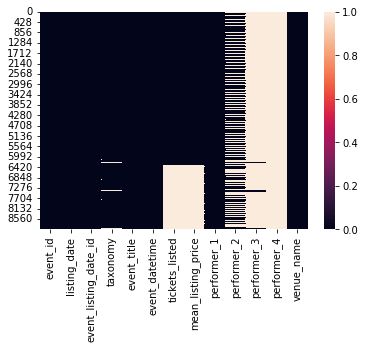

In [4]:
sns.heatmap(df.isna())

# Splitting Data

Upcoming events from 5/20/17 through 8/31/17 are set as null for `tickets_listed` and `mean_listing_price`, so I want to separate this data first as the holdout dataset.

- `df_model`: Dataset that will be used for train/test split
- `df_holdout`: Dataset that will be used as holdout dataset

In [5]:
df_model = df[df.listing_date < '2017-08-01'].isna()

In [6]:
df_holdout = df[df.listing_date >= '2017-08-01']

# Data Analysis

Understand features more to understand how to build the model

- Understand central tendency and distribution of features
- Understand correlation between features and target variables

In [7]:
df.columns

Index(['event_id', 'listing_date', 'event_listing_date_id', 'taxonomy',
       'event_title', 'event_datetime', 'tickets_listed', 'mean_listing_price',
       'performer_1', 'performer_2', 'performer_3', 'performer_4',
       'venue_name'],
      dtype='object')

In [8]:
df.taxonomy.value_counts()

Classical Orchestral     4043
MLB Baseball             2742
Minor League Baseball    2054
Name: taxonomy, dtype: int64

# Data Cleaning

- Impute `null` values
- Identify and handle severe outliers
- Normalize ratio / interval values
- Feature engineer nominal / ordinal values
- Drop unusable features